In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [3]:
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [6]:
df_norm = norm_func(crime.iloc[:,1:])

In [7]:
df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


C:\Users\bhavy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


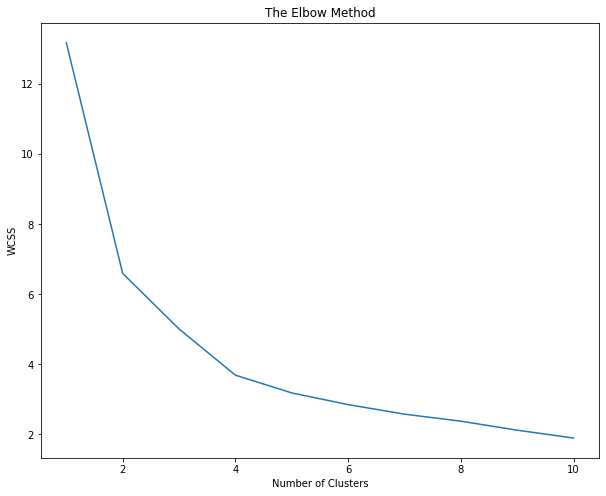

In [8]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [27]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(df_norm)

In [28]:
y_kmeans
clf.labels_

array([1, 5, 4, 3, 4, 4, 0, 3, 4, 1, 0, 2, 4, 3, 2, 3, 3, 1, 2, 4, 0, 4,
       2, 1, 3, 2, 2, 4, 2, 0, 4, 4, 1, 2, 3, 3, 3, 0, 0, 1, 2, 1, 4, 0,
       2, 3, 3, 2, 2, 3])

In [29]:
clf.cluster_centers_

array([[0.2383821 , 0.268591  , 0.84503632, 0.2266519 ],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.37700803, 0.36957763, 0.56073446, 0.35400517],
       [0.6177437 , 0.75031133, 0.798151  , 0.65421658],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031]])

In [30]:
md=pd.Series(y_kmeans)  
crime['clust']=md  
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,5
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,1


In [31]:
crime.iloc[:,1:7].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.757143,123.428571,81.857143,16.071429,0
1,14.671429,251.285714,54.285714,21.685714,1
2,3.091667,76.000000,52.083333,11.833333,2
3,7.058333,152.916667,65.083333,21.000000,3
4,11.054545,264.090909,79.090909,32.618182,4
5,10.000000,263.000000,48.000000,44.500000,5


Text(0.5, 1.0, 'Clusters using KMeans')

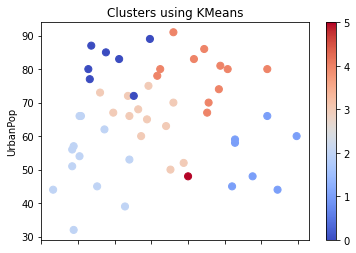

In [32]:
crime.plot(x="Murder",y ="UrbanPop",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [33]:
clf.inertia_

2.840350835701153

In [34]:
WCSS 

[13.184122550256445,
 6.596893867946199,
 5.010878493006419,
 3.690820410392112,
 3.1842618139677223,
 2.850689241794877,
 2.578063352027772,
 2.377258008675051,
 2.1199056357660333,
 1.8962096322651139]